# Learning Outcomes
1. Load, display and save images
2. Load, show and save videos
3. Image resizing

## Why Open CV?
- Compatible in multiple major OS, like Windows, Linux and MacOS, can be written in different languages: C++, Python and Java.
- Interpreterable with Numpy modules, thereby faster computation of image array
- Large community support, a lot of resources (articles and stackoverflow posts regarding OpenCV)

## Image Formats
- JPEG(.jpg, .jpeg, .jfif)
    - photos, smaller file size compared to png
- PNG (.png)
    - website or file transfer
- tiff (.tif)
    - used for printing (high quality). Large file sixze
- bitmap(.bmp)
    - large file size
- gif (.GIF, OpenCV can't deal with GIF)
    - support animation, shallow color depth
- webp (.webp)
    - used for file transfer, not supported by IE

## Load and Show Images

### Setup

In [ ]:
!pip install opencv-contrib-python

In [ ]:
import sys
# at least Python 3.7
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv


In [ ]:
print(cv.__version__)


In [ ]:
img = cv.imread("images/lena.jfif")
grayscale = cv.imread("images/lena.jfif", 0)
# second argument: 1(default, read color image), 0(grayscale), -1: unchanged

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # key binding function: wait for user input
cv.destroyAllWindows()


In [ ]:
def show_img(window_name, img):
    #2 arguments: window name and image***
    cv.imshow(window_name, img)
    cv.waitKey(0) # key binding function: wait for user input
    cv.destroyAllWindows()
    

In [ ]:
img = cv.imread("images/lena.png")

show_img("image", img)


How about GIF? We need external module

In [ ]:
import imageio


In [ ]:
# GIF
GIF = imageio.mimread("images/rotating_earth_large.gif")

#convert RGB to BGR 
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)
    
cv.destroyAllWindows()
        
#show_img("GIF", imgs[0])


In [ ]:
img_jpeg = cv.imread("images/lena.jpg", -1)


## Save Image
    cv.imwrite(filepath, img)

In [ ]:
# formalized way to load, show, and save shape
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("lena", img)
k = cv.waitKey(0) & 0xFF


#if k == 115:
if k == ord('s'): #user have to press 's'
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows() 


## Video Operation with OpenCV

In [ ]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
while True:
    #ret is status， boolean, return true if the frame is available
    #frame is image array vector captured
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows


In [ ]:
img_jpeg = cv.imread("images/soccer.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpeg: {img_jpeg.shape}")
print(f"The shape of png: {img_png.shape}")


## Webcam
Save video captured by webcam

In [ ]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam")

#parameters filepath, fourcc, fps, frame, width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")

fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()


In [ ]:
import time

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No such file")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
    
start = time.time()    
while True:
    #ret is status
    #frame is range
    ret, frame = cap.read()
    if not ret:
        print("No frame detected")
        break
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
end = time.time()    
# cap.release()
cv.destroyAllWindows


In [ ]:
print(f"The fps using the media player: {cap.get(5)}")
total_frame = cap.get(7)
print(f"The fps with OpenCV: {total_frame / (end - start)}")


## Resizing
3 methods to perform resizing

1. set arbitrary sizes
2. state factor

In [ ]:
# Method 1: set any dimension you prefer
img = cv.imread("images/soccer.jpg")

# arguments: source image, dimension, fx, fy, interpolation methods
new_height = 300
new_width = 450
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)


In [ ]:
#aspect ratio = width/ height
#800/1200 = 2/3 original aspect ratio
#300/ 450 = 2/3 resize image aspect ratio
img.shape


In [ ]:
# Method 2: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)


## Exercise 

In [5]:
!pip install opencv-contrib-python

In [6]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [7]:
# Question 1
img = cv.imread("images/dog.jfif")

if img is None:
    sys.exit("Not a valid filepath")

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF

if k == 115:
    cv.imwrite("dog.jpg", img)
    
cv.destroyAllWindows() 


In [8]:
# Question 2
#method 1: cv.imshow() called twice
img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("lena", img)
show_img("grayscale", grayscale)


NameError: name 'show_img' is not defined

In [9]:
# method 2: call matplotlib module
import matplotlib.pyplot as plt


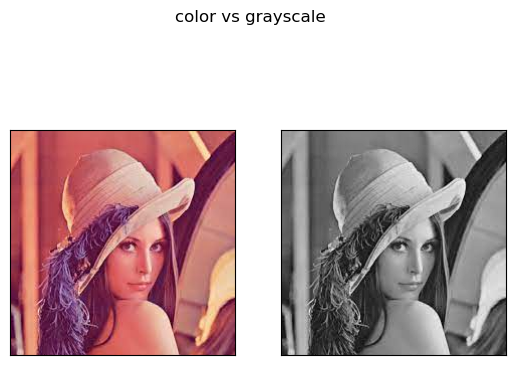

In [10]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()


In [ ]:
# method 3: 


In [ ]:
# Question 3


In [ ]:
# Question 4:
